# Mão na massa - Aula 1

In [1]:
url = '/content/drive/MyDrive/Alura/Cursos/3773 - TensorFlow Keras: Classificando imagens com redes convolucionais/Projeto/corais'

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path(url)

In [4]:
import tensorflow as tf

In [5]:
batch_size = 64
altura = 128
largura = 128

In [6]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 923 files belonging to 2 classes.
Using 739 files for training.


In [7]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=171,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 923 files belonging to 2 classes.
Using 184 files for validation.


In [8]:
treino.class_names

['bleached_corals', 'healthy_corals']

# Mão na massa - Aula 2

In [44]:
tf.random.set_seed(245)

In [45]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  #
])


In [46]:
# Compilando o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',  # Use 'binary_crossentropy' porque o problema é binário
              metrics=['accuracy'])

In [47]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
12/12 [==============================] - 8s 290ms/step - loss: 2.8982 - accuracy: 0.5399 - val_loss: 0.6775 - val_accuracy: 0.6522
Epoch 2/10
12/12 [==============================] - 6s 279ms/step - loss: 0.6874 - accuracy: 0.6793 - val_loss: 0.7517 - val_accuracy: 0.6196
Epoch 3/10
12/12 [==============================] - 7s 344ms/step - loss: 0.5726 - accuracy: 0.7091 - val_loss: 0.5886 - val_accuracy: 0.6848
Epoch 4/10
12/12 [==============================] - 5s 281ms/step - loss: 0.6340 - accuracy: 0.6861 - val_loss: 0.6826 - val_accuracy: 0.6902
Epoch 5/10
12/12 [==============================] - 5s 248ms/step - loss: 0.6715 - accuracy: 0.6996 - val_loss: 0.6189 - val_accuracy: 0.7065
Epoch 6/10
12/12 [==============================] - 6s 331ms/step - loss: 0.5758 - accuracy: 0.7280 - val_loss: 0.6267 - val_accuracy: 0.7011
Epoch 7/10
12/12 [==============================] - 5s 241ms/step - loss: 0.4872 - accuracy: 0.7551 - val_loss: 0.5806 - val_accuracy: 0.7065
Epoch 

In [48]:
import matplotlib.pyplot as plt

In [49]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

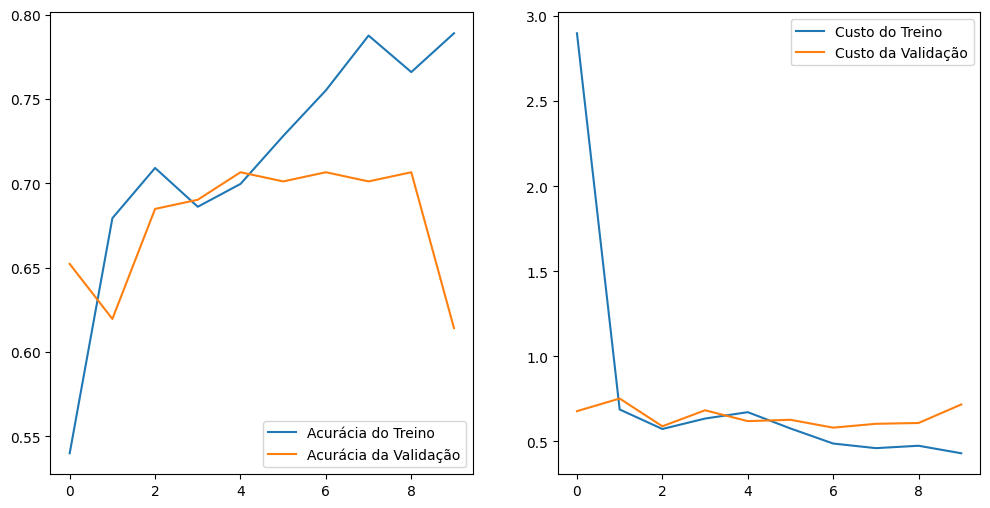

In [50]:
plota_resultados(history,epocas)